Tim Pan (tpan7), Maggie Wang (mwang102)

# Visualizing LDA Clusters

It can be challenging to evaluate a model trained with Unsupervised Learning. There are no ground truth labels. The learned topics aren't "right" or "wrong". The questions is, are the topics useful? 

In this notebook you will visualize the results from your topic modeling in several different ways and reflect on how you can evaluate an Unsupervised Learning algorithm. 

## Imports

In [1]:
import sys
import wordcloud
import numpy as np
import matplotlib.pyplot as plt

''' import project files '''
from data import *
from models import *

In [77]:
data_dir = "../homework5/datasets/"
# note: you can change the dataset here
dataset = "my/"

In [78]:
X_sparse, vocab = build_dtm(data_dir+dataset, num_docs=100)
X = X_sparse.toarray()

## Getting Started: Understanding the Data
Throughout this course, we have emphasized that an important step in ML algorithm development is understanding your data. We have provided the document-word matrix $X$. $X$ is of size num-documents by num-words. You can verify this by looking at the length of vocab and how many documents are in the dataset folder you selected. The entries in $X$ must be integers, element $X[i, j]$ is the count of how many times word $j$ occured in document $i$.

<IPython.core.display.Javascript object>


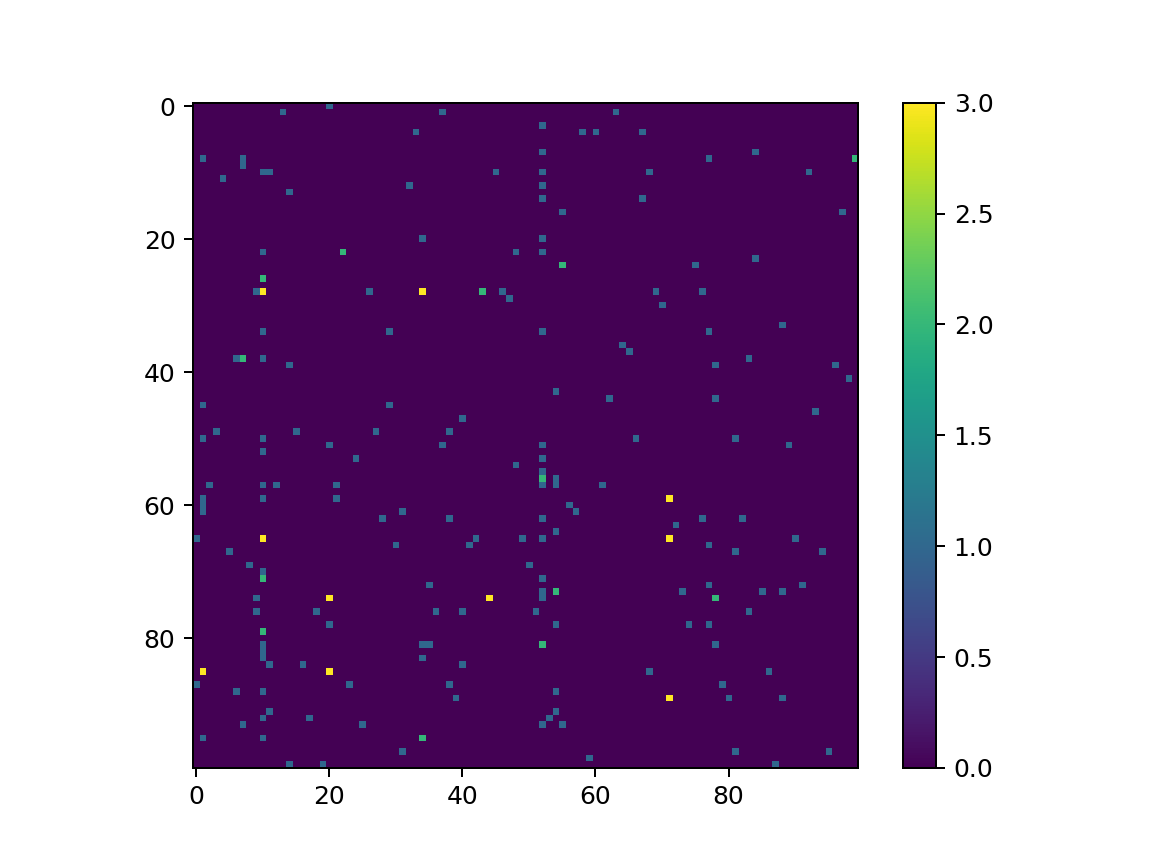

In [79]:
%matplotlib notebook
fig = plt.figure()
plt.imshow(X[0:100, 0:100], vmin=0, vmax=3)
plt.colorbar()
plt.show()

Here we visualize a small portion of $X$. Note that most entries are zero, indicating that the specified vocab word is absent from that document. 

### What words occur most frequently in our dataset? 
To find the total number of occurances of each word in the dataset, we sum each column. 

In [80]:
word_counts = np.sum(X, axis=0)

In [81]:
sorted_words   = np.sort(word_counts)
sorted_indices = np.argsort(word_counts)

<IPython.core.display.Javascript object>


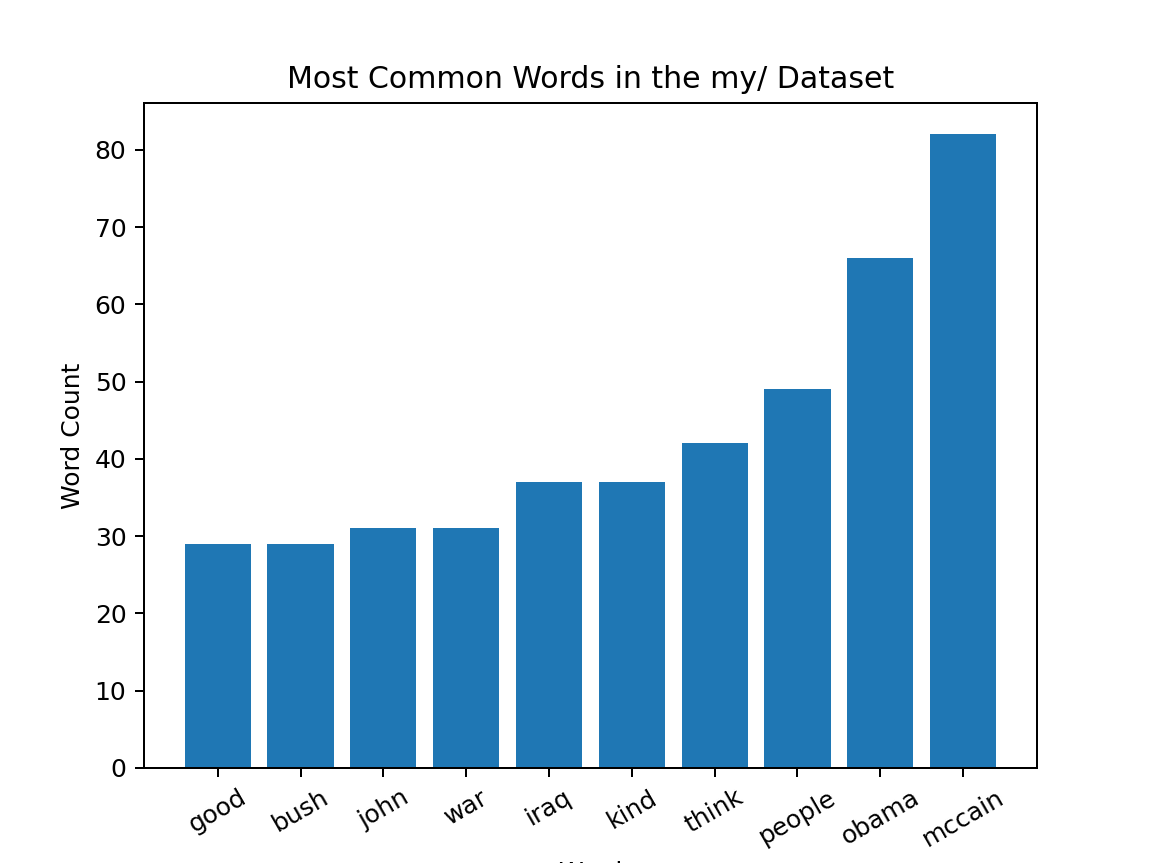

In [82]:
W = len(vocab)
''' Visualize the 10 most frequently used words in our dataset '''
fig = plt.figure()
plt.bar(range(10), sorted_words[W-10:W])
plt.xticks(range(10), list(vocab[sorted_indices[W-10:W]]), rotation=30)
plt.ylabel('Word Count')
plt.xlabel('Word')
plt.title("Most Common Words in the " + dataset +" Dataset")
plt.show()

## Evaluating Your Results
In this section we have provided code to visualize the learned topics in several ways. At the end of the notebook, you will reflect on your model and describe which visualization techniques were helpful and which were not. We have included text throughout to help walk you through the different visualizations. <br>
<b>The questions you need to answer for credit are at the very end and are labeled 'Evaluation Questions'.</b>

In [83]:
''' running our code '''
inference_type  = 'gibbs_sampling' # or 'gibbs_sampling' 
num_topics = 10
alpha = 0.1
beta = 0.01

In [84]:
# build the appropriate model
if inference_type == 'gibbs_sampling':
    inference = GibbsSampling(num_topics=num_topics, num_docs=X.shape[0], 
        num_words=X.shape[1], alpha=alpha, beta=beta)
elif inference_type == 'sum_product':
    inference = SumProduct(num_topics=num_topics, num_docs=X.shape[0], 
        num_words=X.shape[1], num_nonzero=X_sparse.nnz, alpha=alpha, beta=beta)
else:
    raise Exception('The model given by --model is not yet supported.')

# Run the training loop
model = LDA(inference=inference)
model.fit(X=X_sparse, iterations=50)

### Below is a plot of the negative log likelihood of your model over the training iterations. The likelihood should be increasing over the iterations. It should be converging by your final iterations. 

In [85]:
fig = plt.figure()
plt.plot(model.inference.loglikelihoods)
plt.title('Gibbs Sampling: Log Likelihood')
plt.xlabel('Iteration')
plt.show()

<IPython.core.display.Javascript object>

<ipython-input-21-b01fe2e685f6>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


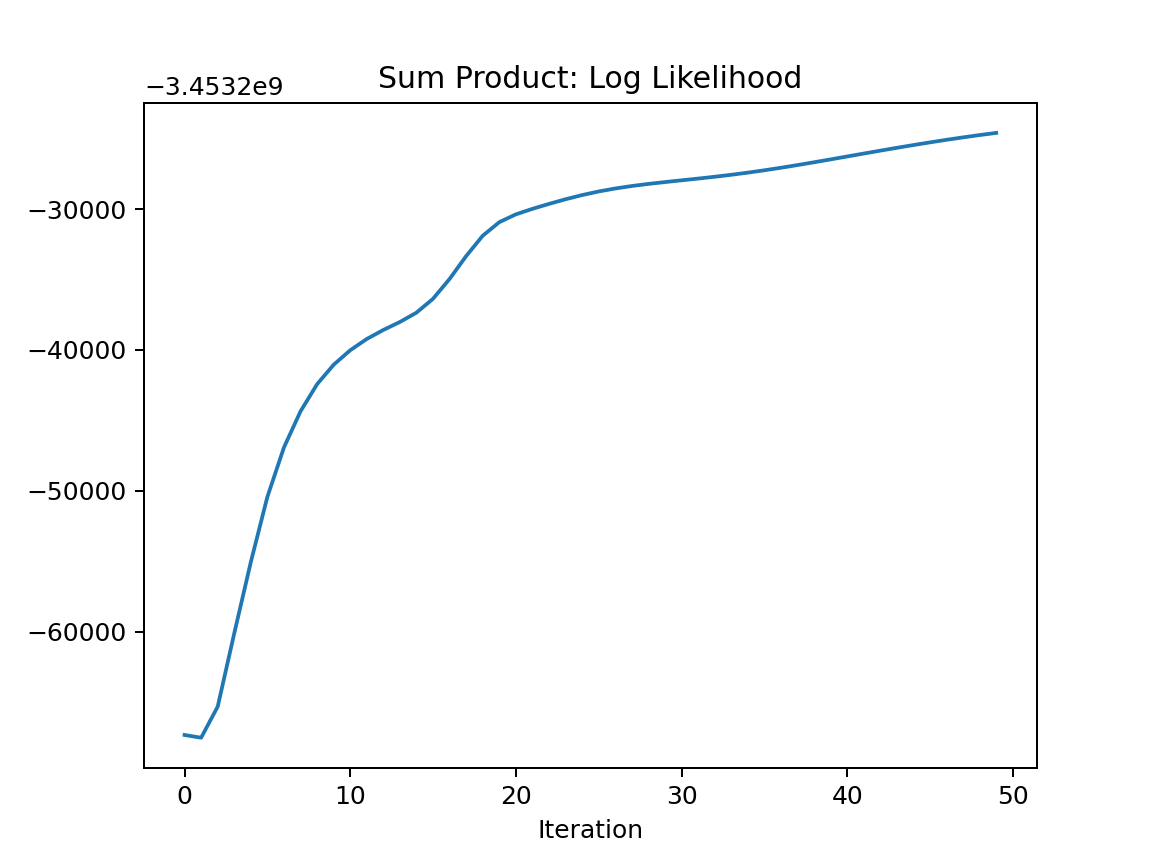

In [21]:
fig = plt.figure()
plt.plot(model.inference.loglikelihoods)
plt.title('Sum Product: Log Likelihood')
plt.xlabel('Iteration')
plt.show()

### Visualization 1
Here we visualize the LDA score given the specified topic for the 10 most frequently used words in our dataset. The higher the score, the more likely the word is in the given topic.

<IPython.core.display.Javascript object>


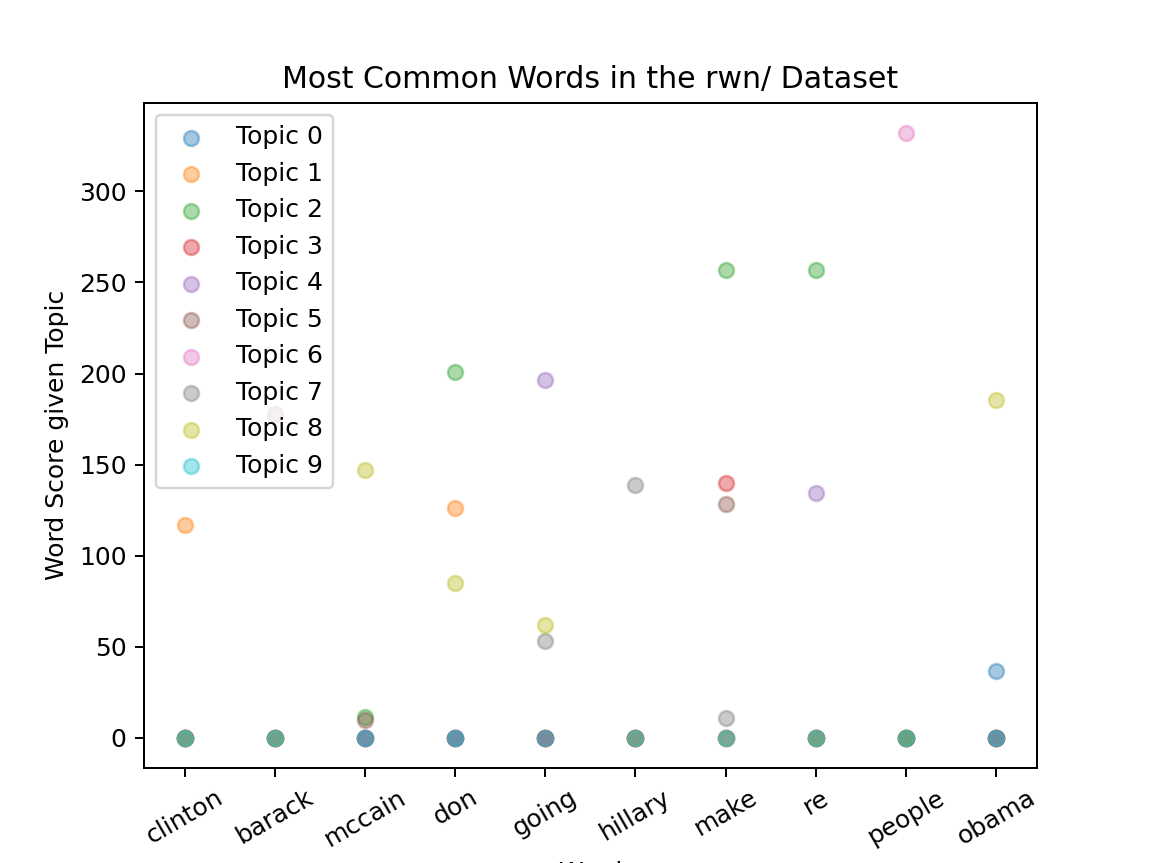

In [75]:
# Gibbs 
W = len(vocab)
fig = plt.figure()
for i in range(model.inference.num_topics):

    plt.scatter(range(10), model.inference.nzw[i][sorted_indices[W-10:W]]/(model.inference.nz[i]/np.sum(model.inference.nz)), alpha=0.4, label="Topic "+ str(i))  
    
plt.xticks(range(10), list(vocab[sorted_indices[W-10:W]]), rotation=30)
plt.ylabel('Word Score given Topic')
plt.xlabel('Word')
plt.title("Most Common Words in the " + dataset +" Dataset")
plt.legend()
plt.show()

### Visualization 2
Here we print out the top $K$ words associated with each topic. 

In [76]:
# Gibbs
K = 5
model.predict(vocab=vocab, K=K)

['Topic 0: good end week back words',
 'Topic 1: know time doesn america say',
 'Topic 2: ll make re ps find',
 'Topic 3: give news things sure blogs',
 'Topic 4: world going republican left kind',
 'Topic 5: barack isn york make great',
 'Topic 6: people work american thing take',
 'Topic 7: government hillary war senator night',
 'Topic 8: years john obama country president',
 'Topic 9: think long saying states let']

In [23]:
# Sum product
K = 5
model.predict(vocab=vocab, K=K)

['Topic 0: war iraq iran mccain people',
 'Topic 1: iraq iran government groups years',
 'Topic 2: obama women dc mccain end',
 'Topic 3: bush cia administration congress committee',
 'Topic 4: obama mccain policy barack people',
 'Topic 5: mccain kind turn trade good',
 'Topic 6: mccain tax income people think',
 'Topic 7: mccain romney john think obama',
 'Topic 8: bit mccain obama people american',
 'Topic 9: clinton obama make hillary stuff']

### Next we plot the top $K$ words by their score given the topic. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


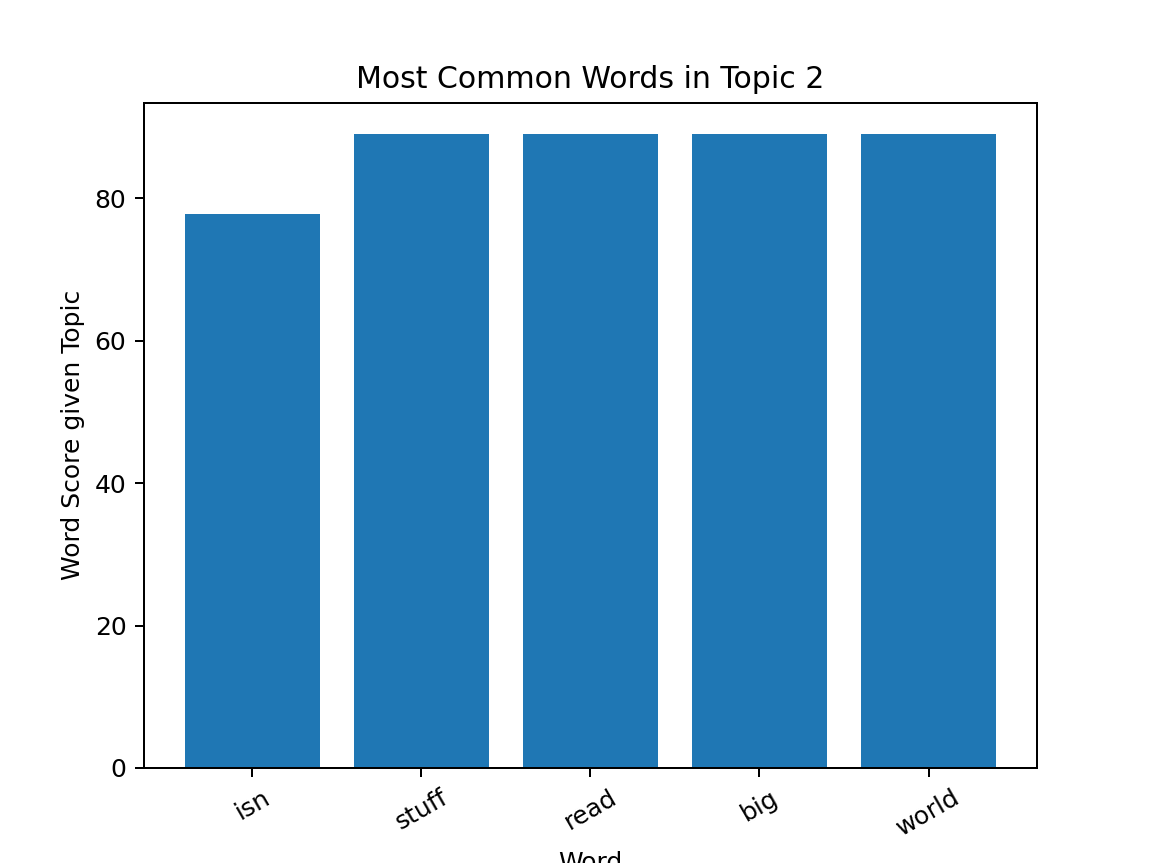

<IPython.core.display.Javascript object>


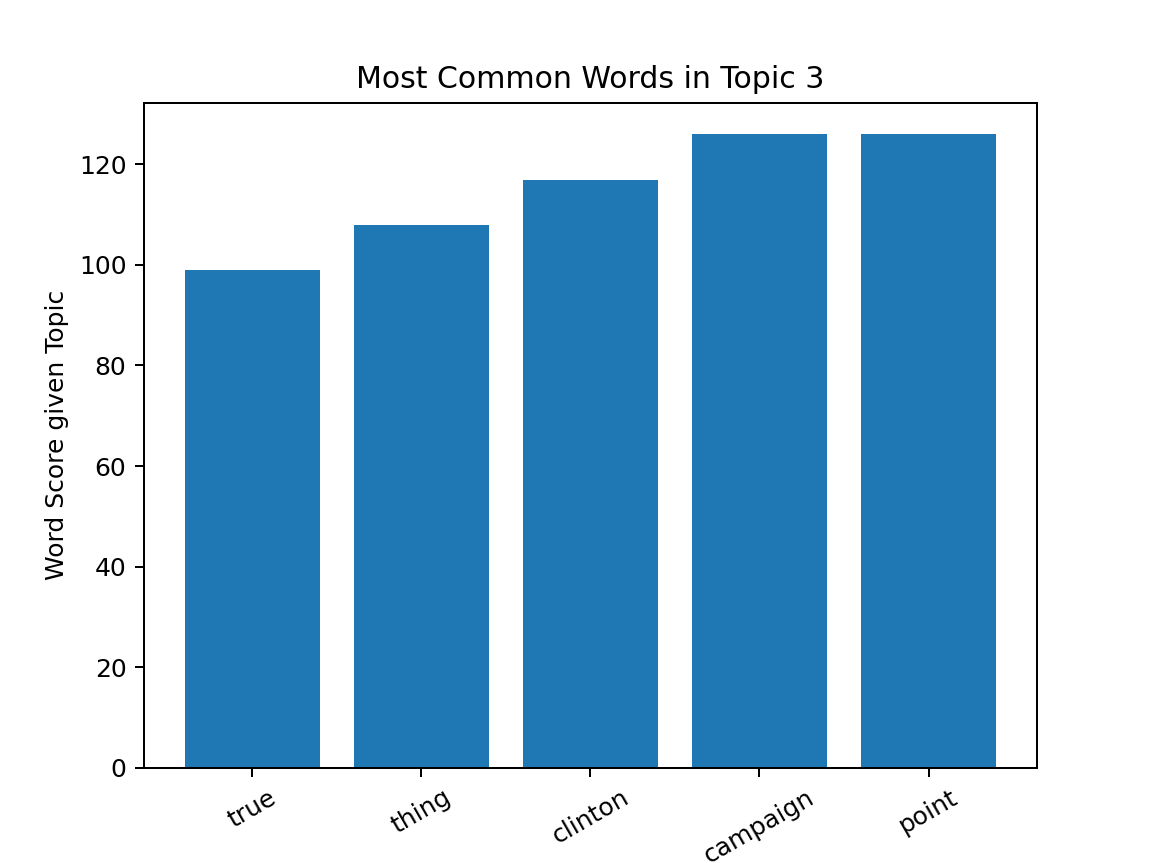

<IPython.core.display.Javascript object>


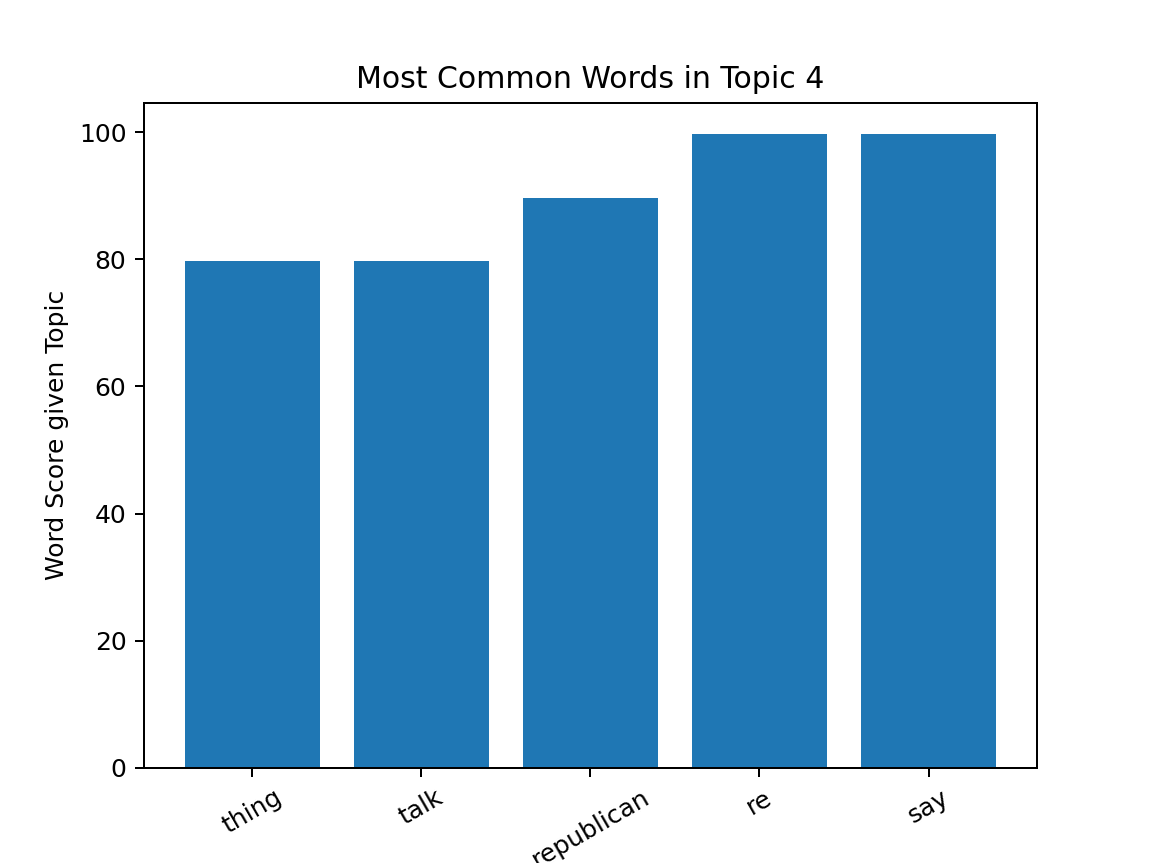

<IPython.core.display.Javascript object>


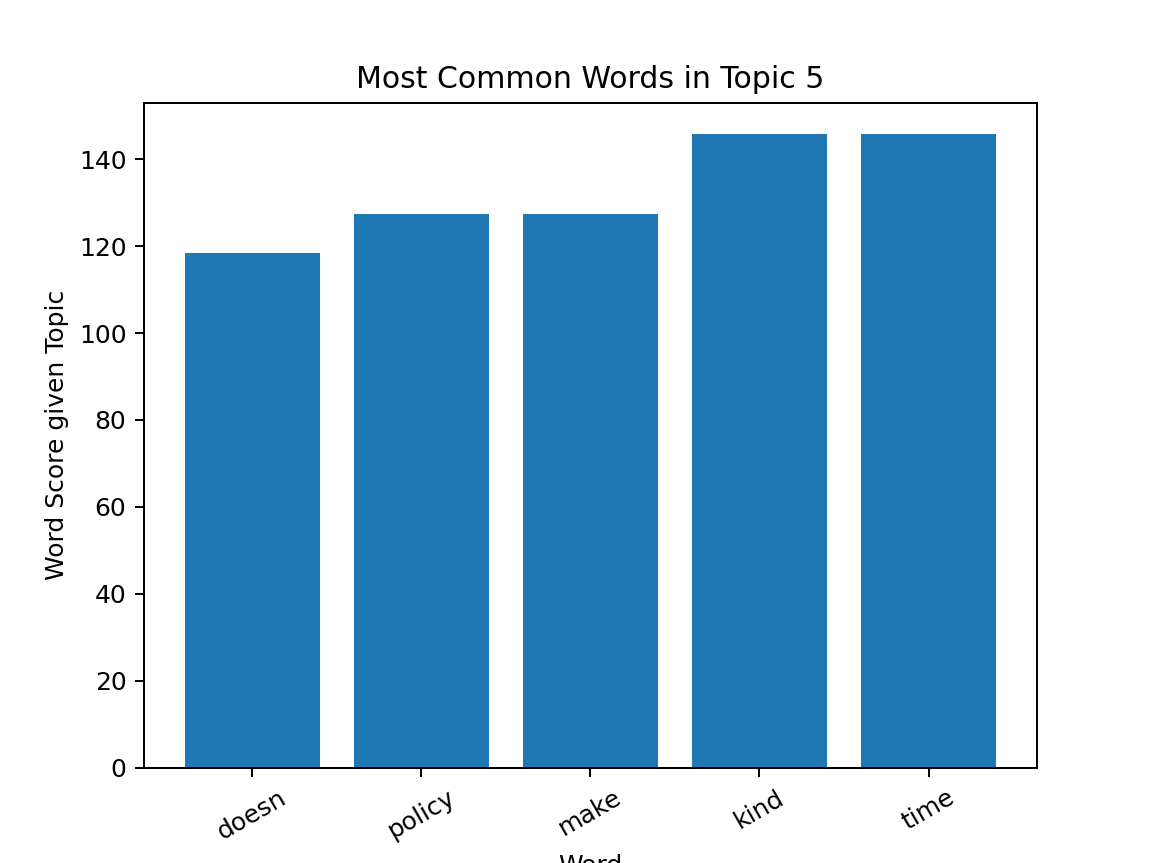

<IPython.core.display.Javascript object>


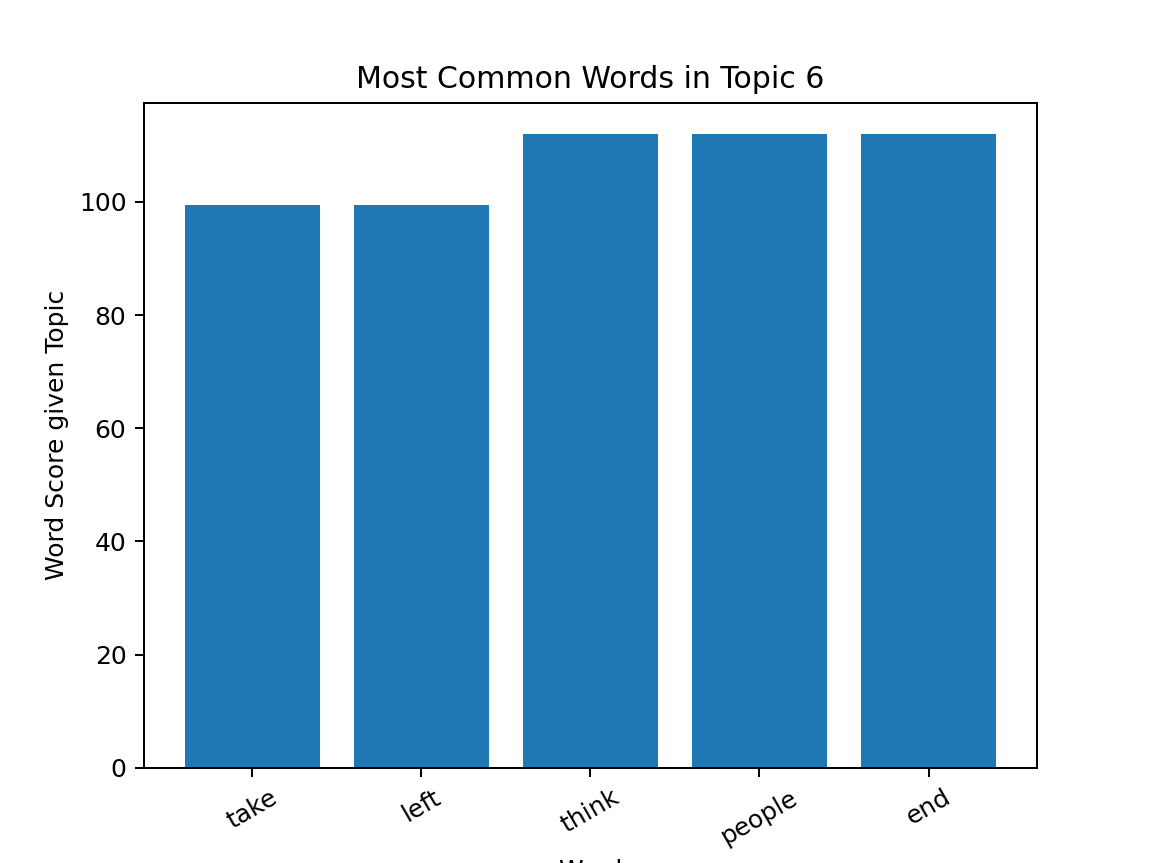

<IPython.core.display.Javascript object>


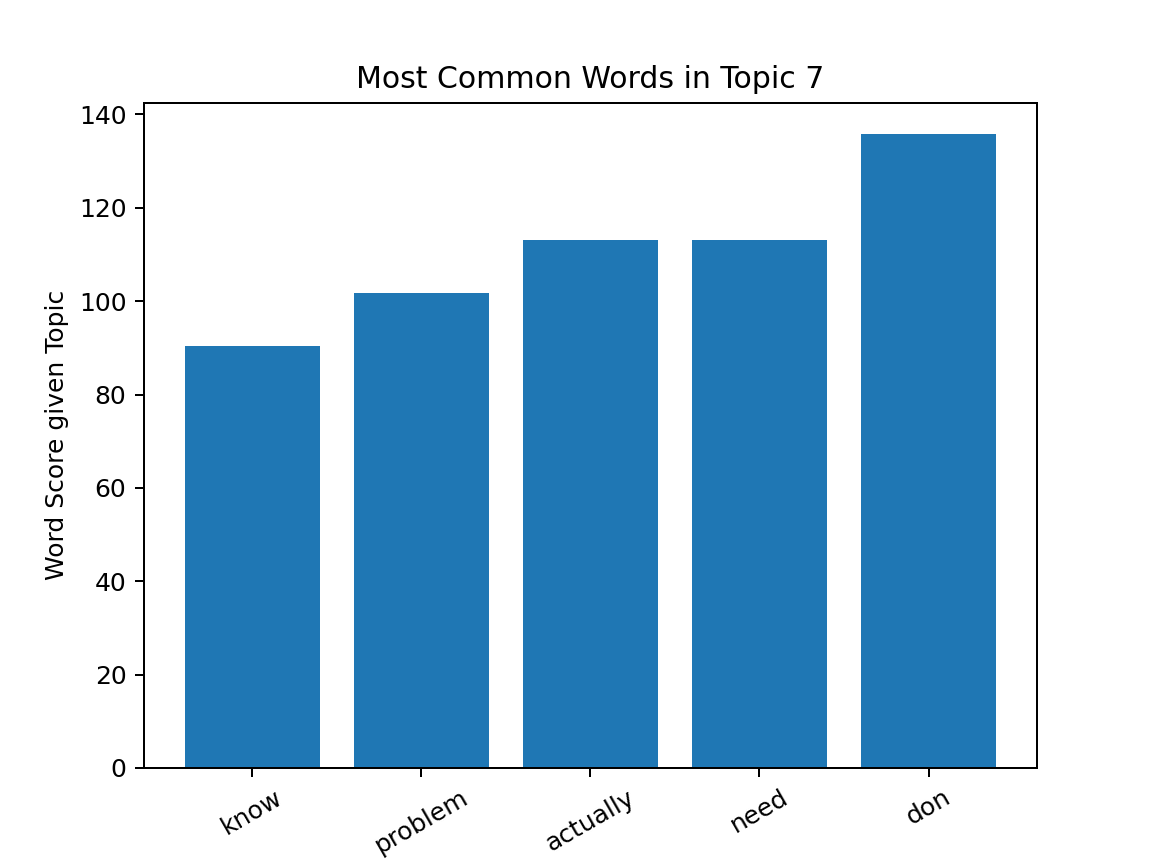

<IPython.core.display.Javascript object>


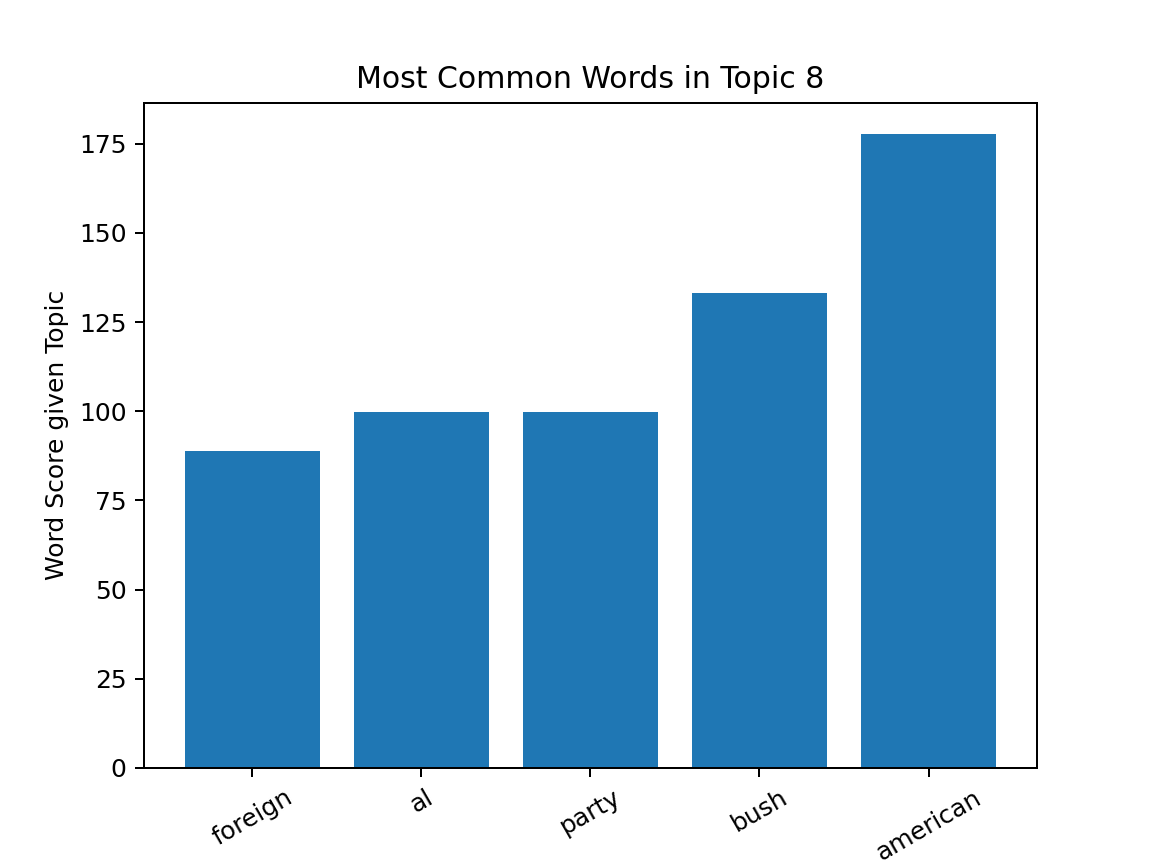

<IPython.core.display.Javascript object>


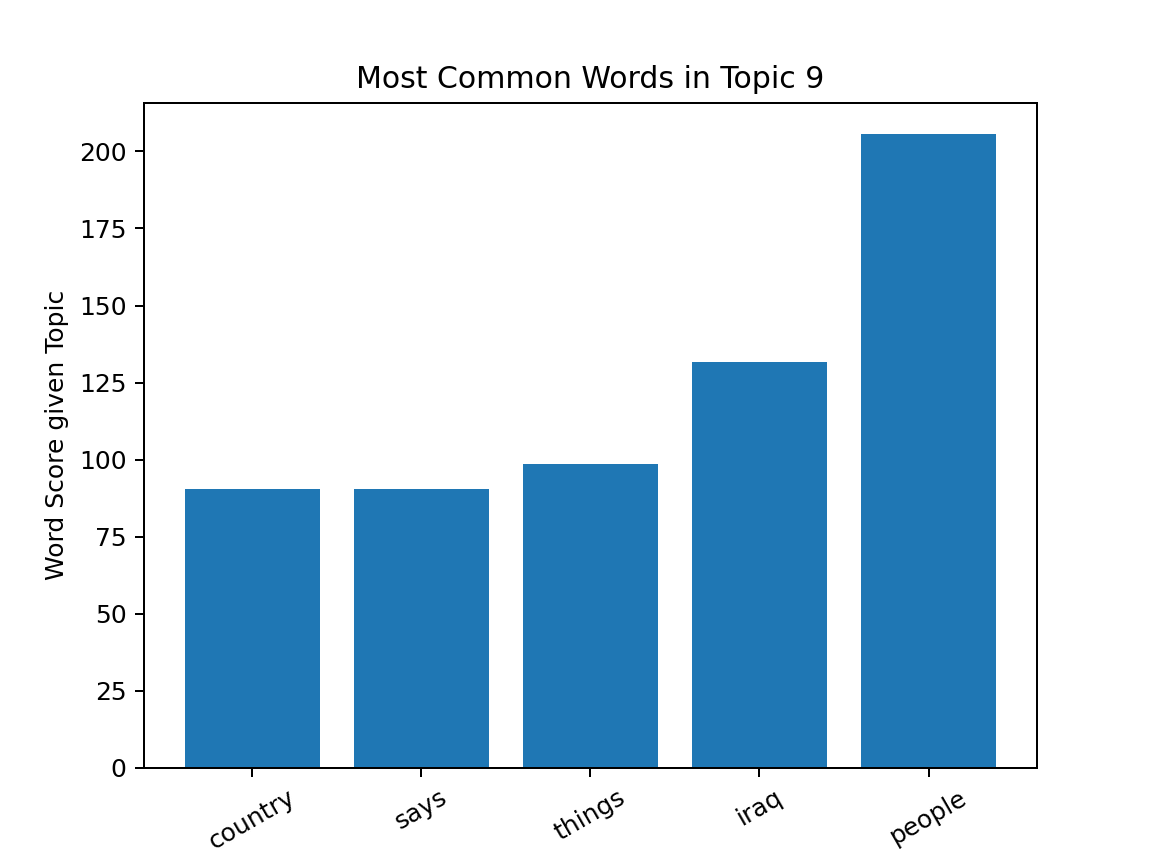

In [14]:
W = len(vocab)
for i in range(model.inference.num_topics):
    topic_words   = np.sort(model.inference.nzw[i]/(model.inference.nz[i]/np.sum(model.inference.nz)))
    topic_indices = np.argsort(model.inference.nzw[i])
    
    fig = plt.figure()
    plt.bar(range(K), topic_words[W-K:W])
    plt.xticks(range(K), list(vocab[topic_indices[W-K:W]]), rotation=30)
    plt.ylabel('Word Score given Topic')
    plt.xlabel('Word')
    plt.title("Most Common Words in Topic " + str(i))
    plt.show()
    

### Visualization 3
Finally, we generate word clouds for the topics. The word size is related to the word score given the topic.

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=K,
                  colormap='tab10',
                  prefer_horizontal=1.0)

In [16]:
topic_dicts = []
for i in range(model.inference.num_topics):
    t_dict = {}
    for j in range(len(vocab)):
        t_dict[vocab[j]] = model.inference.nzw[i][j]/(model.inference.nz[i]/np.sum(model.inference.nz))
        
    topic_dicts.append(t_dict)

<IPython.core.display.Javascript object>


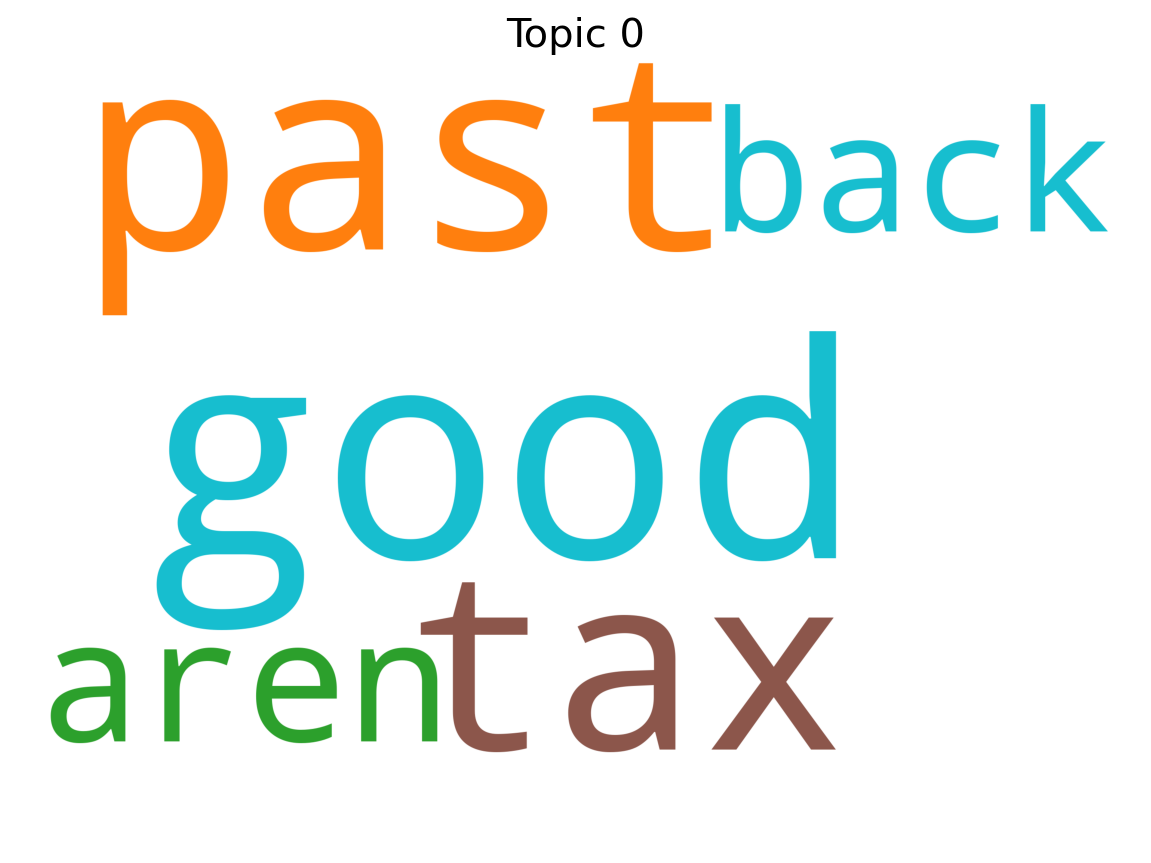

<IPython.core.display.Javascript object>


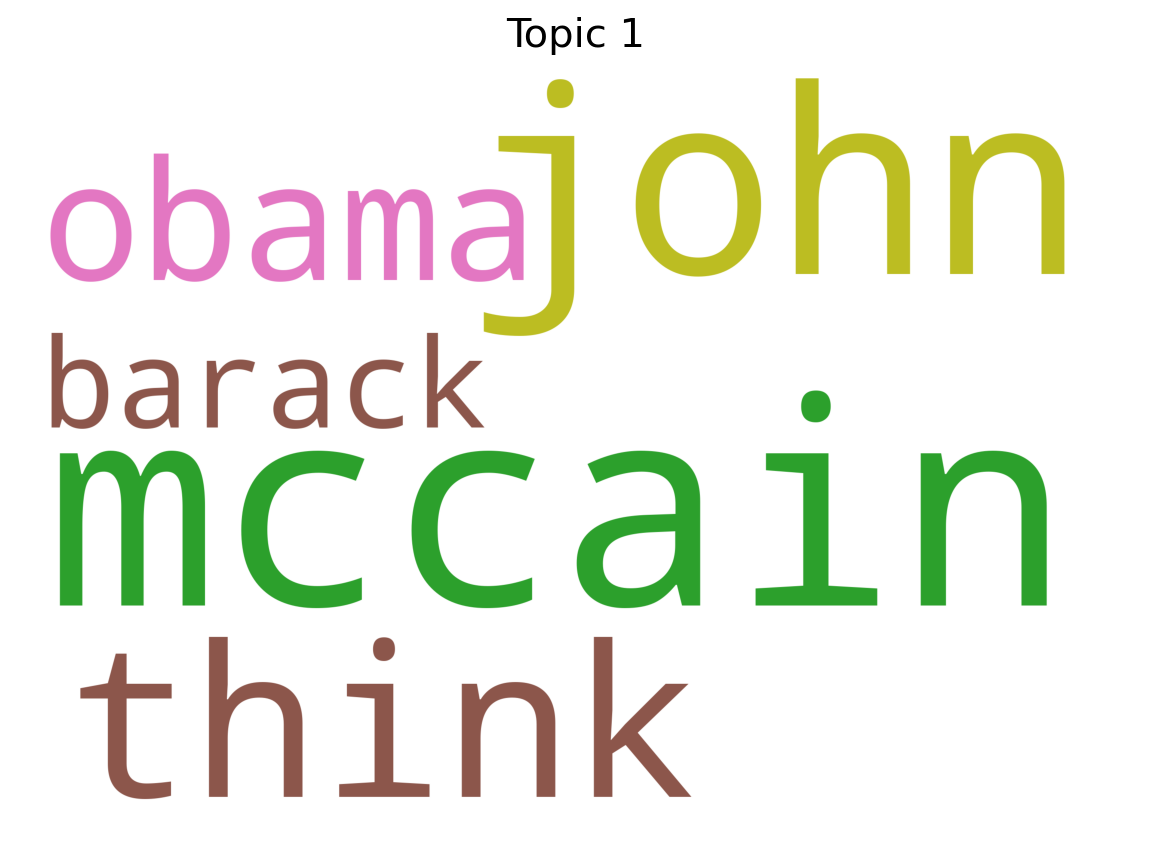

<IPython.core.display.Javascript object>


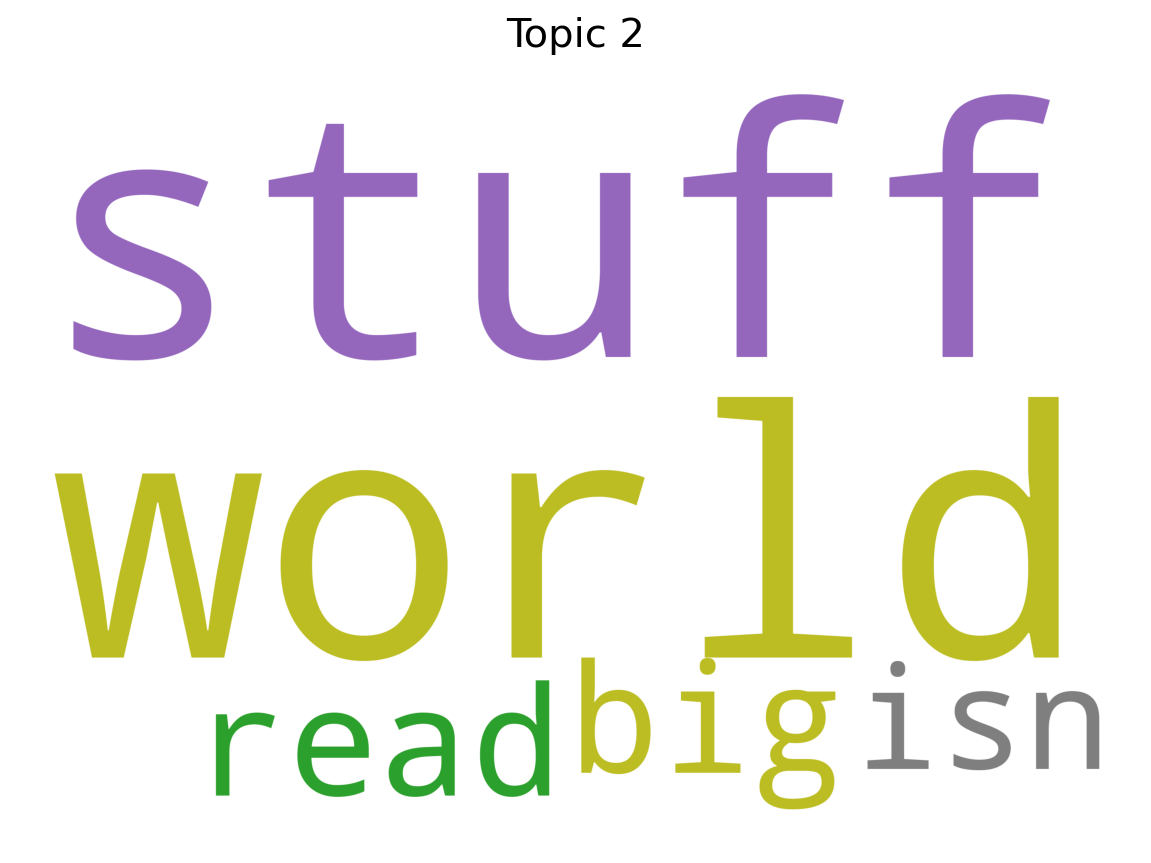

<IPython.core.display.Javascript object>


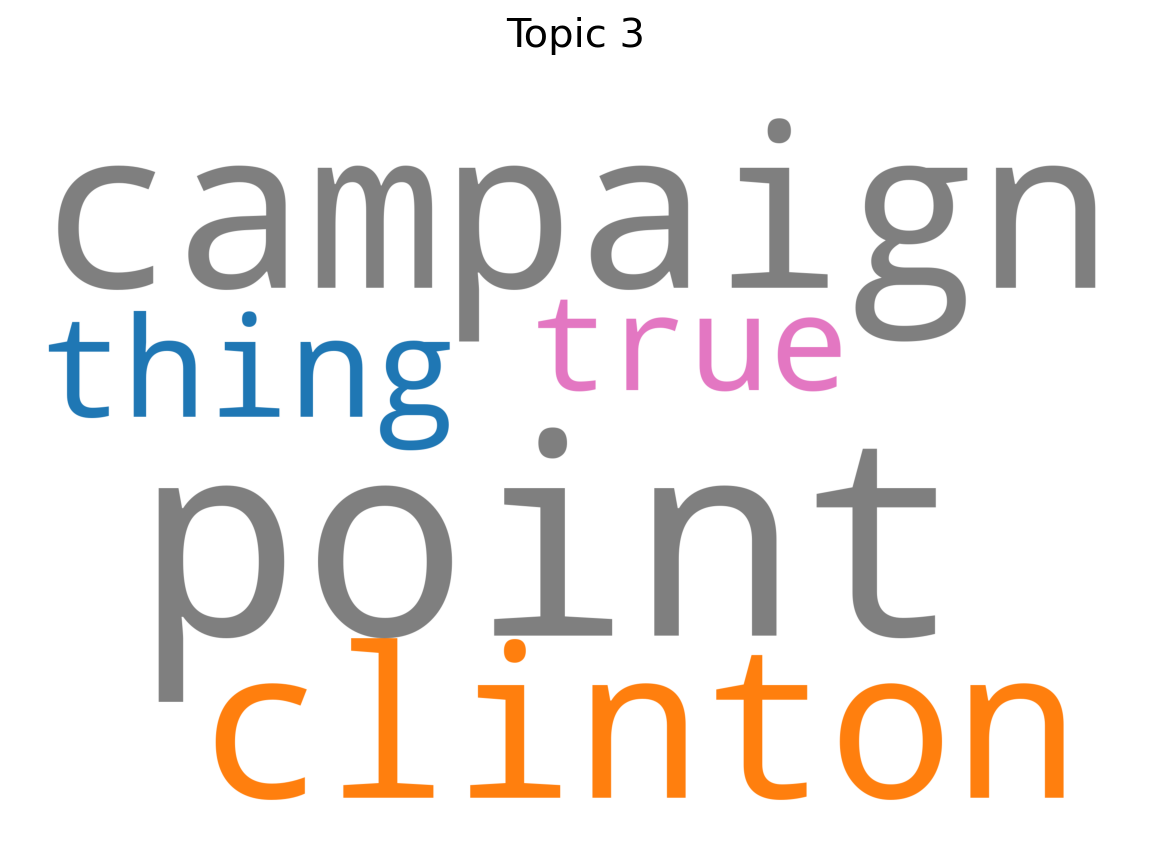

<IPython.core.display.Javascript object>


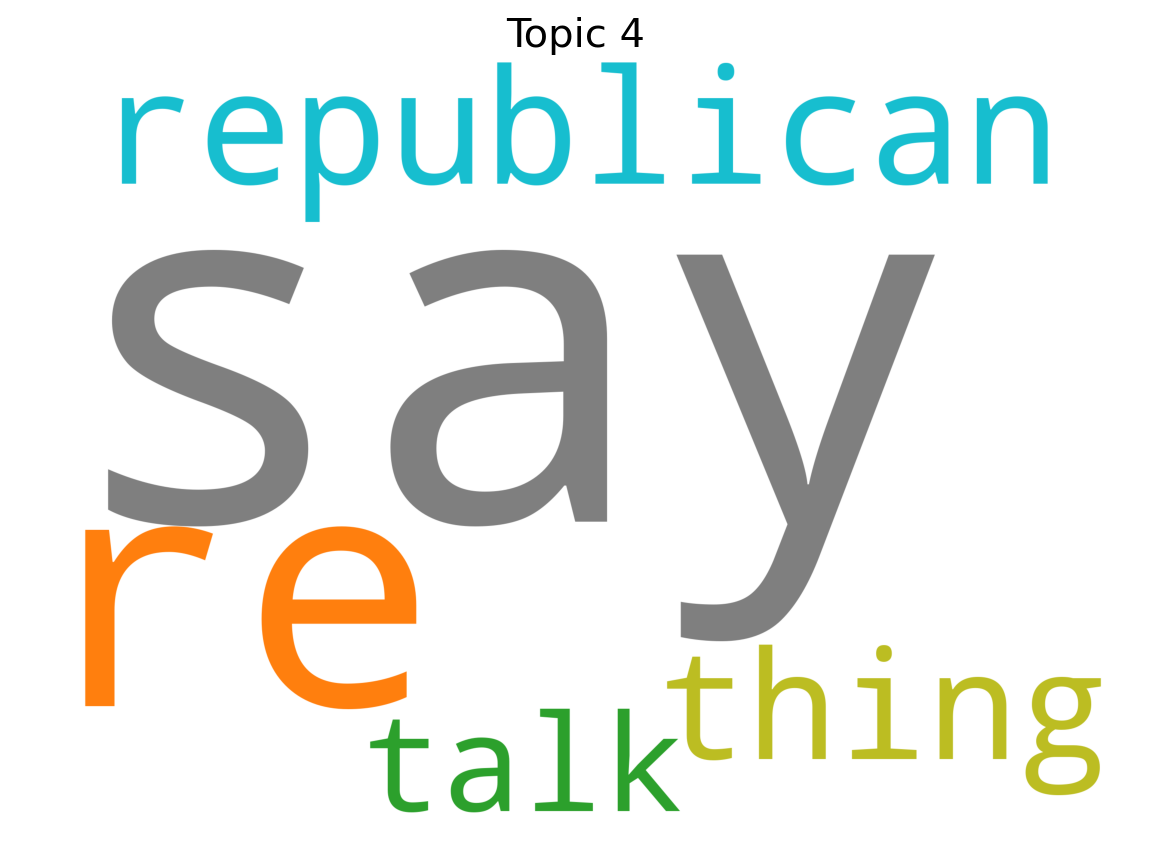

<IPython.core.display.Javascript object>


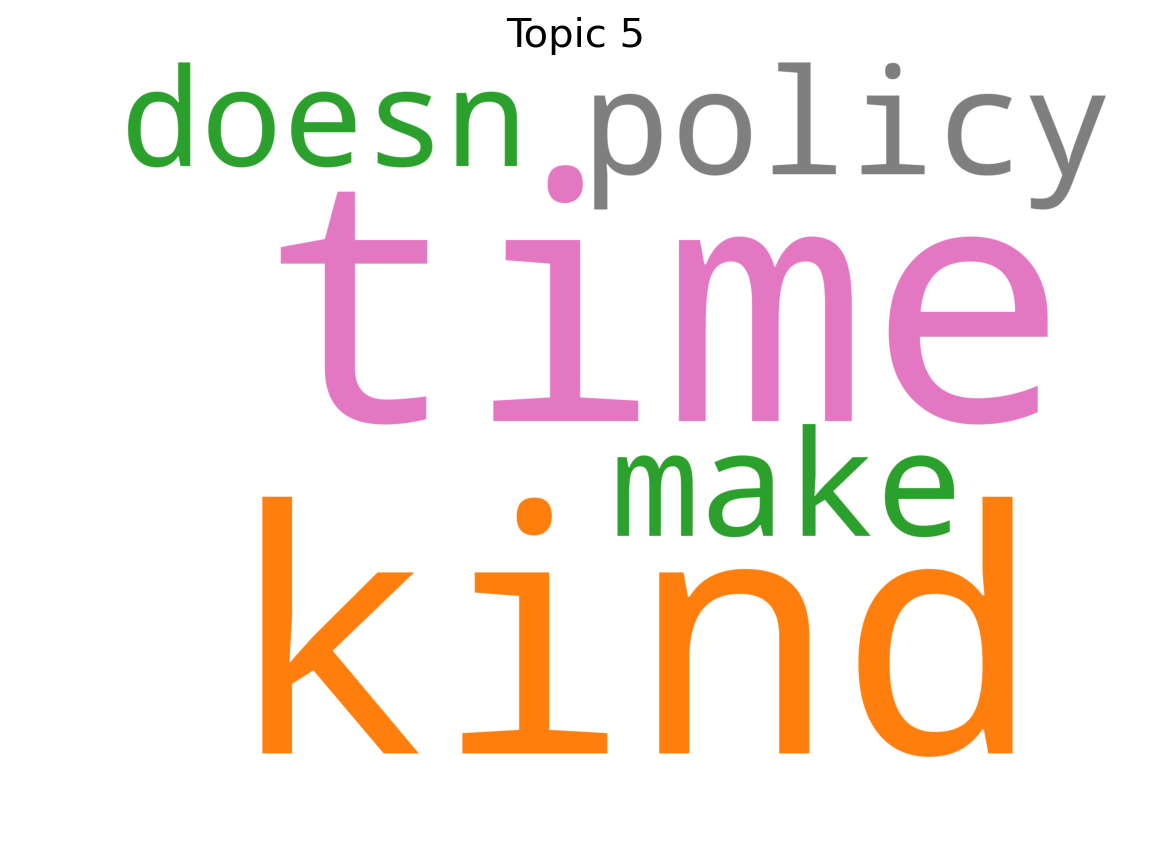

<ipython-input-17-560fb94c0355>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


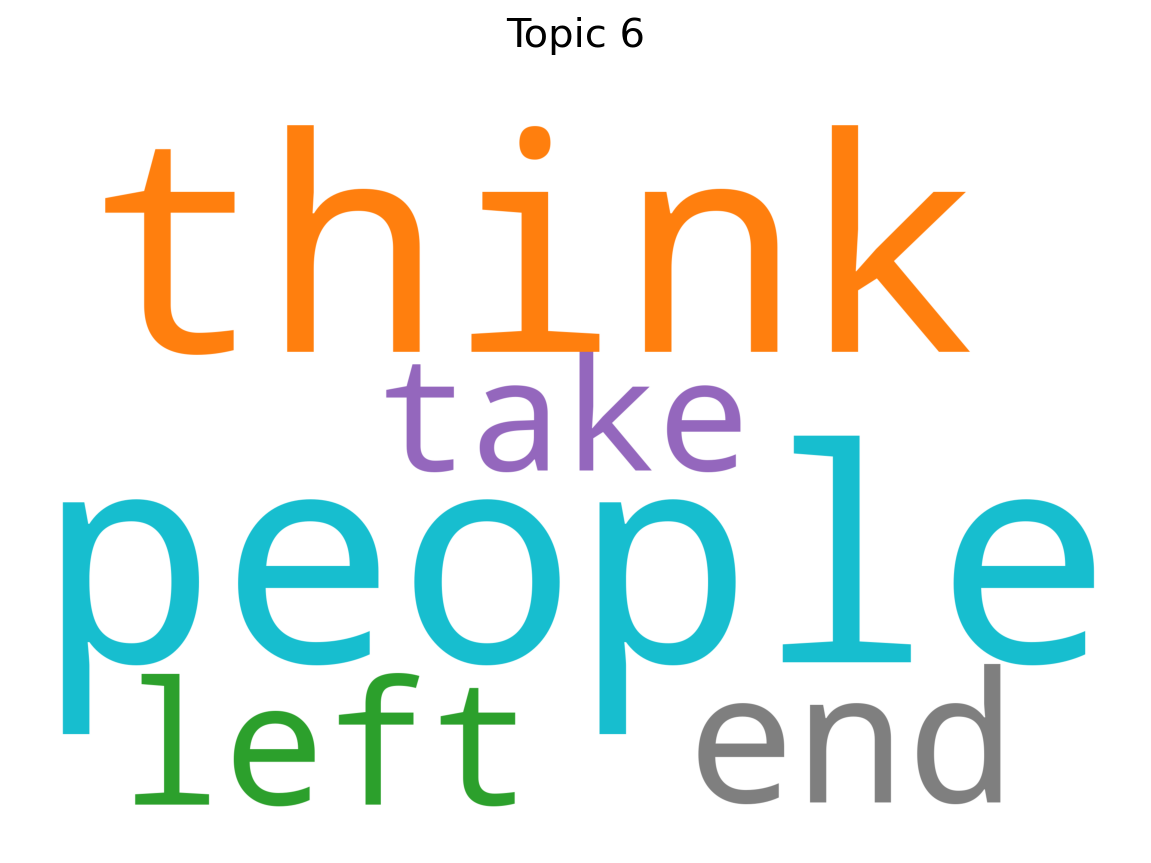

<IPython.core.display.Javascript object>


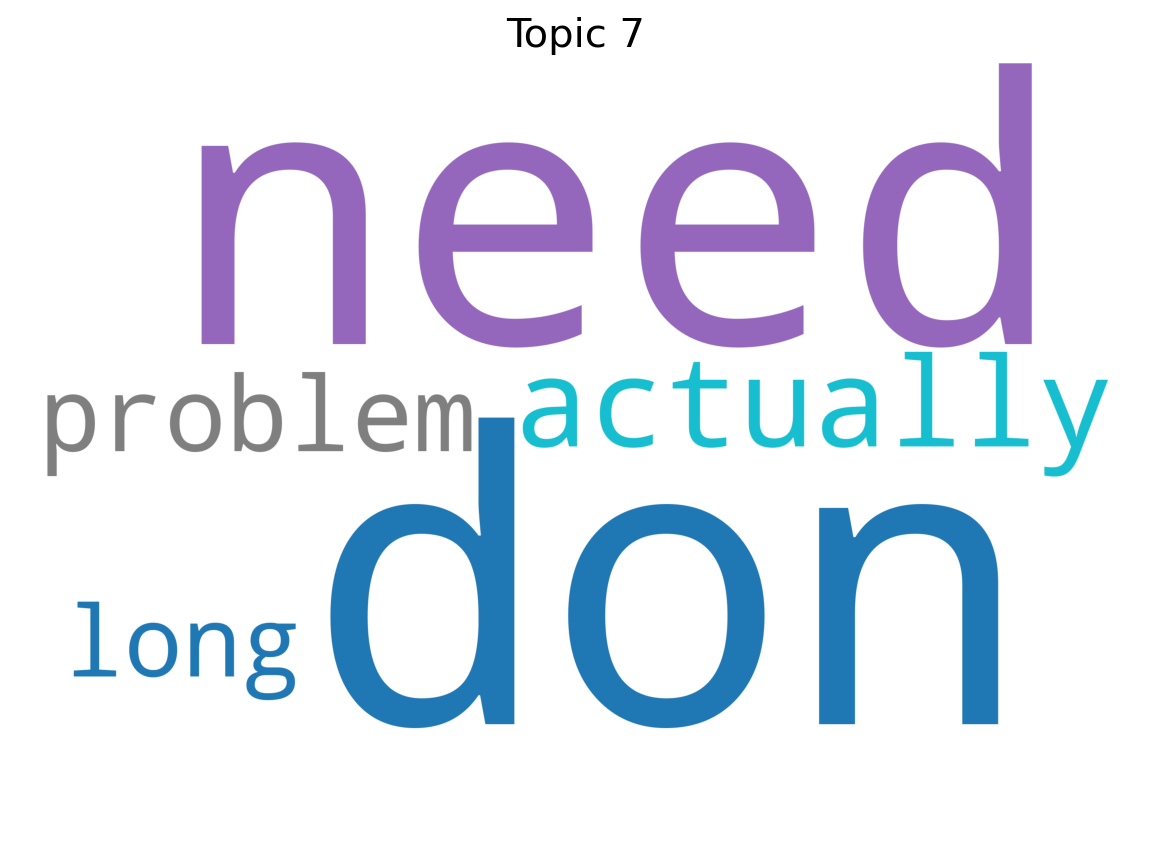

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


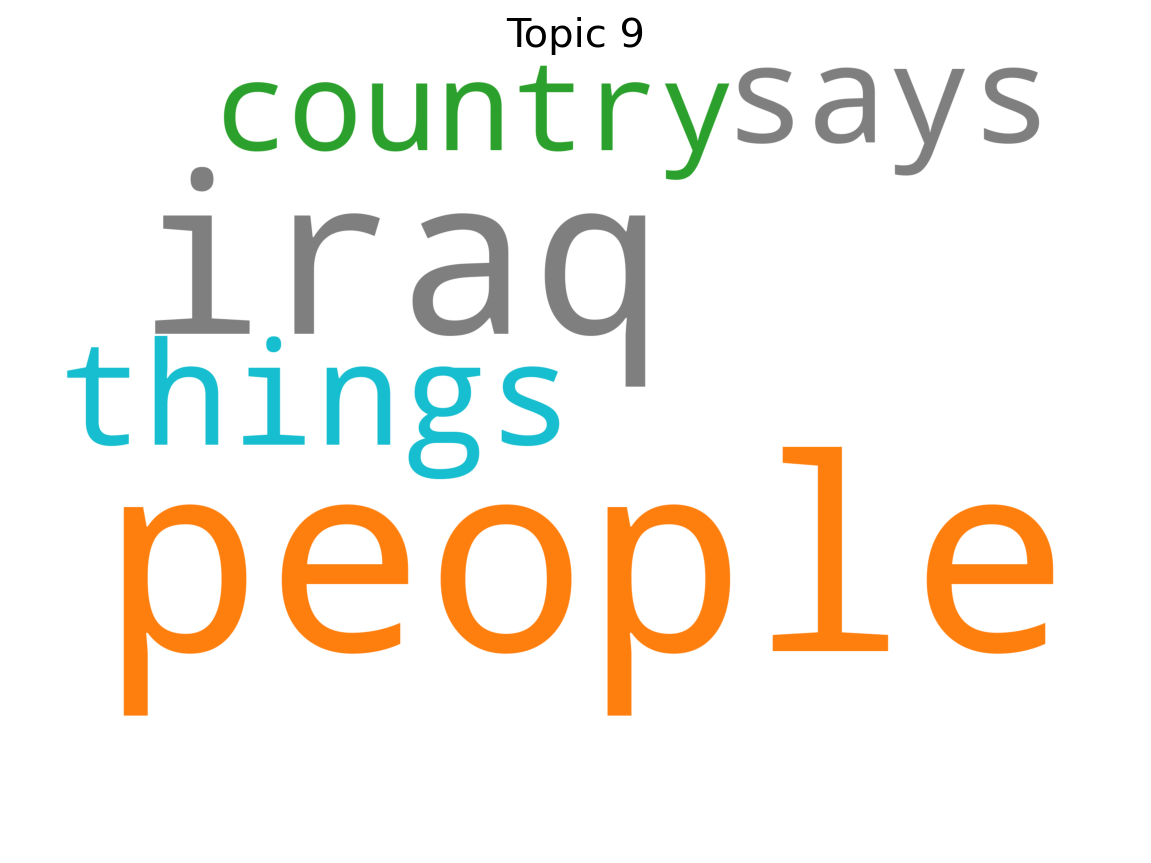

In [17]:
for i in range(model.inference.num_topics):
    fig = plt.figure()
    plt.gca().imshow(cloud.generate_from_frequencies(topic_dicts[i]))
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

## Evaluation Questions
* In the introduction, we stated the data for this assignment comes from American political blogs. When do you think these blog posts are from? <br>

Because words such as "barack", "obama", "john", "mccain", "clinton", and "campaign" appear across the topics, it seems likely that these blog posts are from around the 2008 presidential election. It's also possible that they span earlier years during Bush's presidency, due to the appearance of words such as "bush", "al", and "iraq". The Sum Product algorithm also produced the word "romney" in one of the topics, which suggests the posts may also extend into 2012.

* Run the code for one dataset. Which dataset did you choose? Do you see any patterns to describe the different topics? Compare the topics you observe running with 'gibbs_sampling' with 'sum_product'. Are there any salient differences? <br>

We ran the code on the 'my' dataset. 
    
__Gibbs__: 

 ['Topic 0: good past back plan sense',
 
 'Topic 1: mccain john think obama barack',
 
 'Topic 2: world big read stuff isn',
 
 'Topic 3: point campaign clinton thing true',
 
 'Topic 4: say re republican talk thing',
 
 'Topic 5: time kind make policy doesn',
 
 'Topic 6: end people think left take',
 
 'Topic 7: don need actually problem know',
 
 'Topic 8: american bush party al foreign',
 
 'Topic 9: people iraq things says country']
 
 Topic 1 appears to have grouped together the 2008 presidential candidate names. Topic 8 contains the words "bush","american", and "foreign" and appears to be related to foreign policy. Topic 3 contains the words "campaign", "true", and "point" which are terms that may arise during debates. </i>

__Sum Product__:

['Topic 0: war iraq iran mccain people',

 'Topic 1: iraq iran government groups years',
 
 'Topic 2: obama women dc mccain end',
 
 'Topic 3: bush cia administration congress committee',
 
 'Topic 4: obama mccain policy barack people',
 
 'Topic 5: mccain kind turn trade good',
 
 'Topic 6: mccain tax income people think',
 
 'Topic 7: mccain romney john think obama',
 
 'Topic 8: bit mccain obama people american',
 
 'Topic 9: clinton obama make hillary stuff']

Topics 0 and 1 appear to pertain to the Iraq/Iran Wars. Topic 4 is related to the 2008 election. Topic 6 might be about Republican tax policy. Topic 9 seems to be about the 2008 Democratic primary.

__Comparison__ : It appears that related words such as "obama", "mccain" tend to be grouped together in both Gibbs sampling and Sum Product, but the thematic ordering of the topics is arbitrary. Sum Product also gave more cohesive, understandable word groupings.

#### For the remaining questions, you can answer using only one inference method. Note, Sum Product tends to run faster. 

* Experiment running with a different number of topics. What changes with the different number of topics? How would you go about selecting the number of topics to use in practice? <br> 

*The following comes from the Gibbs Sampling algorithm*
    
__K = 5__: 

['Topic 0: obama clinton hillary end isn',

 'Topic 1: kind think obama iraq doesn',
 
 'Topic 2: good lot years part world',
 
 'Topic 3: make american re policy bush',
 
 'Topic 4: people mccain john thing don']
 
 As in the K = 10 case, the names of presidential candidates still emerge as the dominant words amongst the topics. However, the words in each topic seem less coherent. This might be because the model was restricted to far fewer topics than the number that actually exist in the blog posts, and thus found it difficult to group words appropriately. The log likelihood plot demonstrated better convergence after 50 iterations because it's easier to learn a fewer number of topics.
 
__K = 15__:

['Topic 0: iraq american al military people',

 'Topic 1: doesn big policy high say',
 
 'Topic 2: tax top terrible plan actually',
 
 'Topic 3: administration war bush policy says',
 
 'Topic 4: bad win state sure clear',
 
 'Topic 5: mccain kind thing john record',
 
 'Topic 6: lot committee country course make',
 
 'Topic 7: republican want race looks education',
 
 'Topic 8: bit think take people back',
 
 'Topic 9: good percent things yesterday money',
 
 'Topic 10: government points sense general congress',
 
 'Topic 11: obama mccain point campaign barack',
 
 'Topic 12: obama clinton political hillary stuff',
 
 'Topic 13: issue sort read time politics',
 
 'Topic 14: good don great president fact']
 
  Again, the names of presidential candidates still emerge as the dominant words amongst the topics. In general, the words belonging to each topic are more coherent and easily understandable than both the K=5 and K=10 cases. For instance, Topic 0 is definitely about the Iraq War, Topic 2 is about tax policy, Topic 3 is about the Bush administration, and Topic 11 is about the 2008 campaign. This result is expected, because with more topics, the model is less confined and has more flexibility in assigning words to topics, thus allowing for more rational word groupings.

* Now run the visualization code for at least 2 other datasets. Which datasets did you choose? Do you notice different patterns? Can you guess the point of view in the different datasets?

We ran Gibbs Sampling on the "dk" and "rwn" datasets with 10 topics. The word distributions are shown below:

__dk__:

['Topic 0: deal money candidate days face',
 
 'Topic 1: vote won end think ve',
 
 'Topic 2: ll american americans mean times',
 
 'Topic 3: people america candidates republicans doesn',
 
 'Topic 4: democratic likely campaign matter made',
 
 'Topic 5: state party bill post back',
 
 'Topic 6: know senate good early going',
 
 'Topic 7: bush house time re years',
 
 'Topic 8: mccain say take real media',
 
 'Topic 9: obama don win race week']
 
 __rwn__:
 
 ['Topic 0: good end week back words',
 
 'Topic 1: know time doesn america say',
 
 'Topic 2: ll make re ps find',
 
 'Topic 3: give news things sure blogs',
 
 'Topic 4: world going republican left kind',
 
 'Topic 5: barack isn york make great',
 
 'Topic 6: people work american thing take',
 
 'Topic 7: government hillary war senator night',
 
 'Topic 8: years john obama country president',
 
 'Topic 9: think long saying states let']
 
 
 The topic themes are much more difficult to discern in both of these datasets. However, we notice that in the "dk" dataset, Topic 9 contains the words "obama", "win", and "race" and Topic 4 contains the words"democratic", "likely", and "campaign". These groupings point to the posts potentially being written by a liberal-leaning author. In the "rwn" dataset, Topic 5 include "barack", "isn", "great", which suggests that the author of these posts is more likely to be conservative.

* Which visualizations did you find useful? Which were not useful? What task can you imagine this topic model being used for? Can you identify a short-coming of your current model? 

Visualization 2 was the most useful because it was the cleanest and easiest to read. It was very clear what words belonged to each topic and their relative importance within the topic. The remaining visualizations were not very intuitive and slightly excessive, detracting from the actual results themselves. This topic model could be used to automatically generate tags for the post representing the post's topics, making it easier for it to be found in online searches. The current model doesn't provide what each topic actually is, but rather only the words within the topic. This keeps it from being a true classifier and limits the amount of information that is conveyed in the results.